## Imports

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

## Data Loading

In [231]:
# Provide the full path to the files or ensure they are in the current working directory
individual_data = pd.read_csv("individual_data.csv")  
health_expenditure = pd.read_csv("health_expenditure.csv", skiprows=4) 

In [232]:
display(individual_data.head())

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [233]:
# Drop unnecessary columns
columns_to_drop = ["ID", "Treatment Type", "Tumor Size (cm)", "Cancer Stage"]
individual_data.drop(columns=columns_to_drop, inplace=True)

In [234]:
display(health_expenditure.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,93.889833,88.835308,93.106458,93.222292,90.334281,81.969193,93.053627,NaN,NaN,NaN
2,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,60.058540,61.486458,66.909218,71.334305,74.234108,80.288055,81.319763,NaN,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,71.938048,62.715816,60.835189,59.561036,61.997588,64.798255,73.120225,NaN,NaN,NaN
4,Angola,AGO,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,107.643562,94.106155,112.851471,83.899200,64.657791,55.051022,64.163422,NaN,NaN,NaN


In [235]:
# Drop unnecessary columns
health_expenditure = health_expenditure[["Country Name", "2021"]].copy()
# Rename columns for clarity
health_expenditure.columns = ["Country", "Health Expenditure"]

In [236]:
display(health_expenditure.head())

,Country,Health Expenditure
0,Aruba,NaN
1,Africa Eastern and Southern,93.053627
2,Afghanistan,81.319763
3,Africa Western and Central,73.120225
4,Angola,64.163422


**Join two Dataset**

In [237]:
# Merge the two datasets on the "Country" column
merged_data = pd.merge(individual_data, health_expenditure, left_on="Country", right_on="Country", how="left")
# Check for missing values in merged data
missing_values = merged_data.isnull().sum()
print("Missing values in merged data:\n", missing_values)

Missing values in merged data:
 Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)                     0
Economic Burden (Lost Workdays per Year)    0
Early Diagnosis                             0
Oral Cancer (Diagnosis)                     0
He

In [238]:
display(merged_data.head())

,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),...,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis),Health Expenditure
0,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,...,No,No,No,No,100.000000,0.00,0,No,No,3350.000000
1,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,...,No,Yes,No,No,83.340103,77772.50,177,No,Yes,4347.000000
2,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,...,No,No,No,Yes,63.222871,101164.50,130,Yes,Yes,5738.484863
3,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,...,Yes,No,No,No,100.000000,0.00,0,Yes,No,166.000000
4,South Africa,68,Male,No,No,No,No,No,Yes,High,...,No,No,No,No,44.293199,45354.75,52,No,Yes,583.671082


## Visualization and Hypothesis Testing

**Early Diagnoses vs Health Expenditure**

In [239]:
# 1. Convert 'Early Diagnosis' to numeric
merged_data['Early Diagnosis Numeric'] = merged_data['Early Diagnosis'].map({'Yes': 1, 'No': 0})

# 2. Group by country and calculate the mean of 'Early Diagnosis Numeric' and 'Health Expenditure'
country_grouped = merged_data.groupby('Country').agg({
    'Early Diagnosis Numeric': 'mean',
    'Health Expenditure': 'mean' 
}).reset_index()

# 3. Use trashold value to split the data into two groups
threshold = country_grouped['Health Expenditure'].median()
high = country_grouped[country_grouped['Health Expenditure'] > threshold]
low = country_grouped[country_grouped['Health Expenditure'] <= threshold]

# 4. Apply T test
t_stat, p_val = ttest_ind(high['Early Diagnosis Numeric'], low['Early Diagnosis Numeric'], equal_var=False)

# 5. Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Decide on rejection of null hypothesis
alpha = 0.05
if p_val < alpha:
    print("\nReject the null hypothesis: There is a significant difference in early diagnosis rates between high and low health expenditure countries.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in early diagnosis rates between high and low health expenditure countries.")


T-statistic: 2.589
P-value: 0.021

Reject the null hypothesis: There is a significant difference in early diagnosis rates between high and low health expenditure countries.


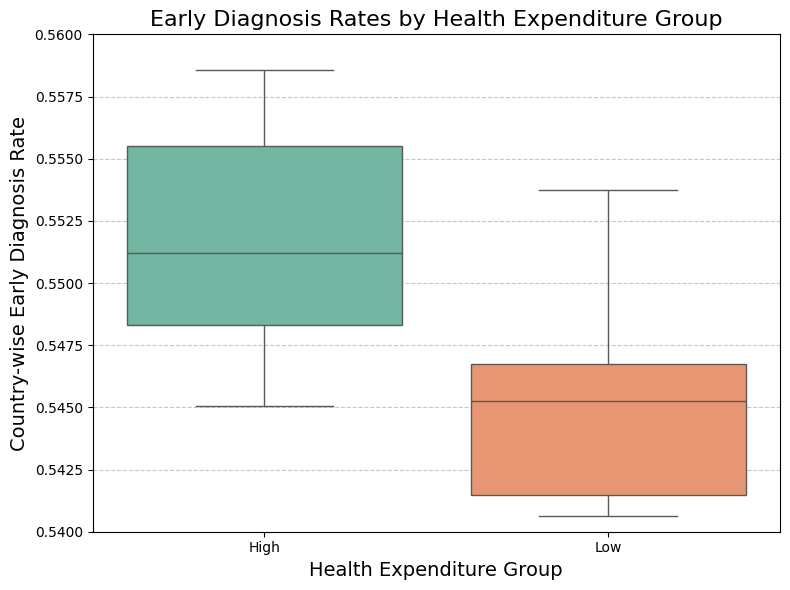

In [240]:
# Classify countries into high and low health expenditure groups based on the median
threshold = country_grouped['Health Expenditure'].median()
country_grouped['Spending Group'] = country_grouped['Health Expenditure'].apply(
    lambda x: 'High' if x > threshold else 'Low'
)

# Boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Spending Group', y='Early Diagnosis Numeric',hue='Spending Group' ,data=country_grouped, palette='Set2', legend=False)

# Title and labels
plt.title('Early Diagnosis Rates by Health Expenditure Group', fontsize=16)
plt.xlabel('Health Expenditure Group', fontsize=14)
plt.ylabel('Country-wise Early Diagnosis Rate', fontsize=14)
plt.ylim(0.54, 0.56)  # Adjusted y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Early Diagnosis vs Survival Rate**

In [241]:
# Consider the only oral cancer patients
cancer_patients = merged_data[merged_data['Oral Cancer (Diagnosis)'] == 'Yes']

# Separate the data into two groups based on early diagnosis
early = cancer_patients[cancer_patients['Early Diagnosis'] == 'Yes']['Survival Rate (5-Year, %)']
late = cancer_patients[cancer_patients['Early Diagnosis'] == 'No']['Survival Rate (5-Year, %)']

# Perform T-test
t_stat, p_val = ttest_ind(early, late, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Decide on rejection of null hypothesis
if p_val < alpha:
    print("\nReject the null hypothesis: There is a significant difference in survival rates between early and late diagnosis groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in survival rates between early and late diagnosis groups.")


T-statistic: 2.966
P-value: 0.003

Reject the null hypothesis: There is a significant difference in survival rates between early and late diagnosis groups.


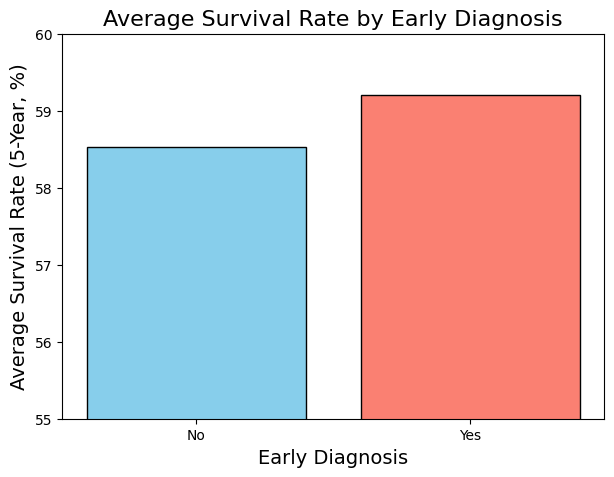

In [242]:
# Group the average survival
group_means = cancer_patients.groupby('Early Diagnosis')['Survival Rate (5-Year, %)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(7, 5))
bars = plt.bar(group_means['Early Diagnosis'], group_means['Survival Rate (5-Year, %)'],
               color=['skyblue', 'salmon'], edgecolor='black')
# Title and labels
plt.title('Average Survival Rate by Early Diagnosis', fontsize=16)
plt.xlabel('Early Diagnosis', fontsize=14)
plt.ylabel('Average Survival Rate (5-Year, %)', fontsize=14)
plt.ylim(55, 60)  # Set y-axis limits for better visibility

plt.show()


**Categorical Variables vs Oral Cancer**

In [248]:
# Columns we want to compare
candidate_columns = ['Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 'Betel Quid Use',
    'Chronic Sun Exposure', 'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
    'Oral Lesions', 'Unexplained Bleeding', 'Difficulty Swallowing',
    'White or Red Patches in Mouth', 'Gender']

for attribute in candidate_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(merged_data[attribute], merged_data['Oral Cancer (Diagnosis)'])

    # Perform Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Attribute: {attribute}")
    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"P-value: {p:.3f}")

    # Decide on rejection of null hypothesis
    if p < alpha:
        print(f"\nReject the null hypothesis:\nThere is a significant association between {attribute} and Oral Cancer.")
    else:
        print(f"\nFail to reject the null hypothesis:\nThere is no significant association between {attribute} and Oral Cancer.")
    print("-" * 40)

Attribute: Tobacco Use
Chi-squared statistic: 0.296
P-value: 0.586

Fail to reject the null hypothesis:
There is no significant association between Tobacco Use and Oral Cancer.
----------------------------------------
Attribute: Alcohol Consumption
Chi-squared statistic: 0.211
P-value: 0.646

Fail to reject the null hypothesis:
There is no significant association between Alcohol Consumption and Oral Cancer.
----------------------------------------
Attribute: HPV Infection
Chi-squared statistic: 0.013
P-value: 0.910

Fail to reject the null hypothesis:
There is no significant association between HPV Infection and Oral Cancer.
----------------------------------------
Attribute: Betel Quid Use
Chi-squared statistic: 0.212
P-value: 0.645

Fail to reject the null hypothesis:
There is no significant association between Betel Quid Use and Oral Cancer.
----------------------------------------
Attribute: Chronic Sun Exposure
Chi-squared statistic: 0.073
P-value: 0.786

Fail to reject the null h

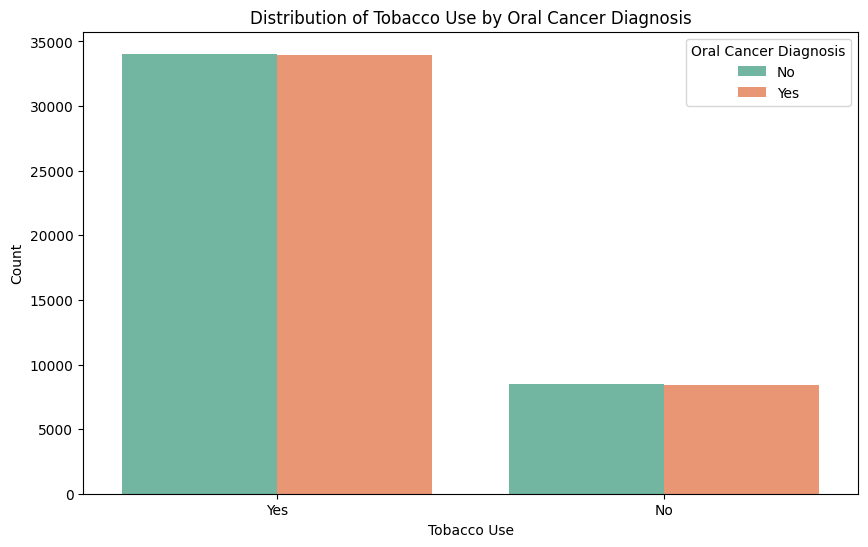

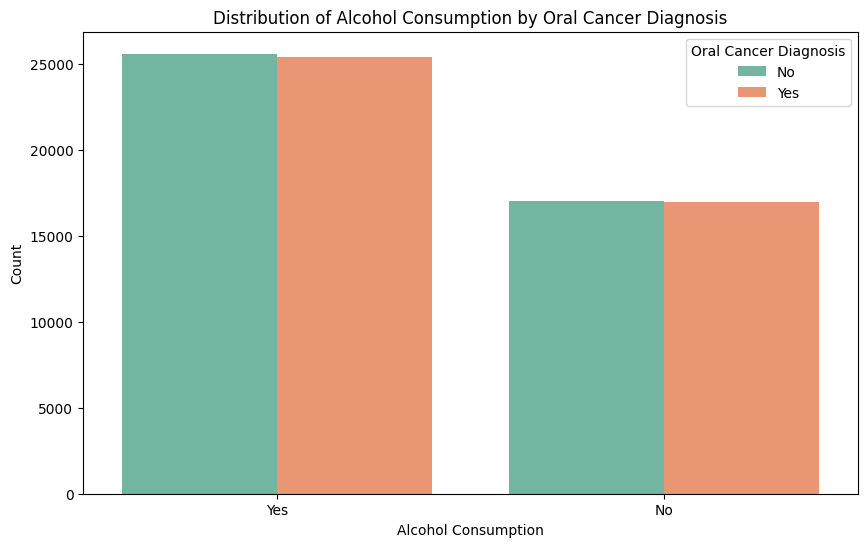

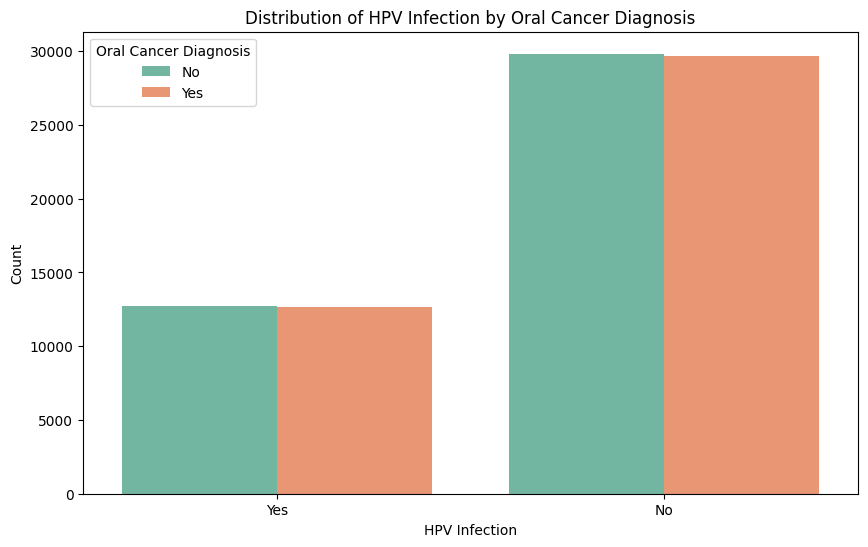

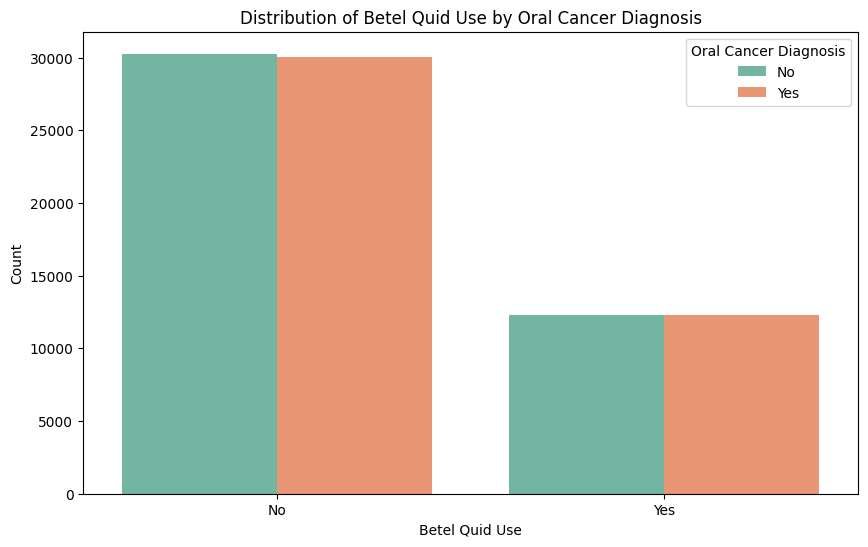

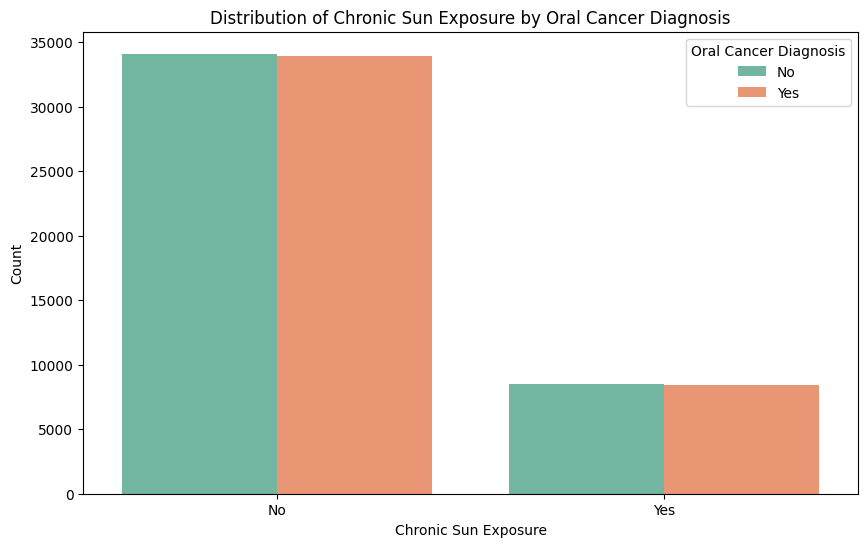

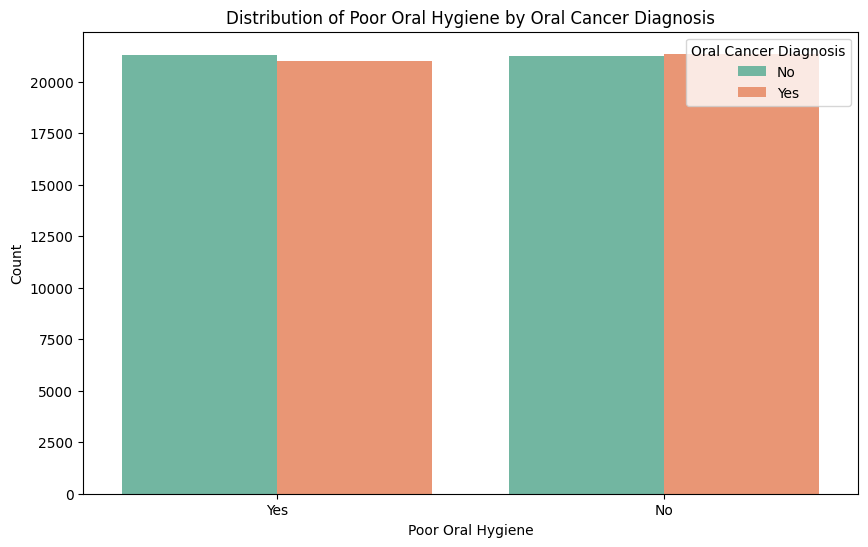

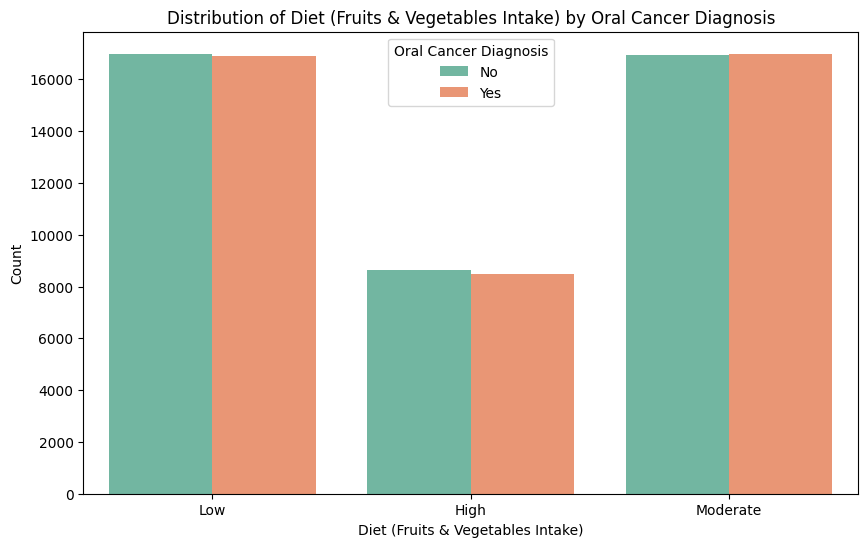

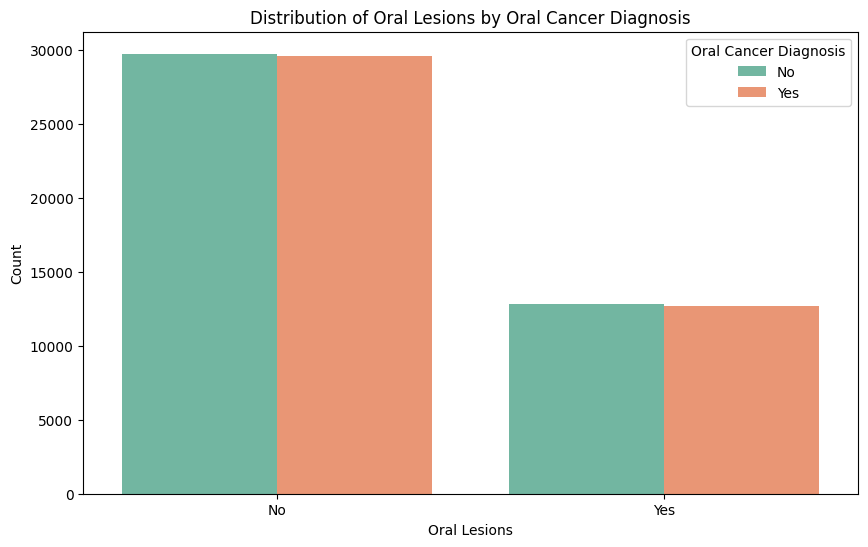

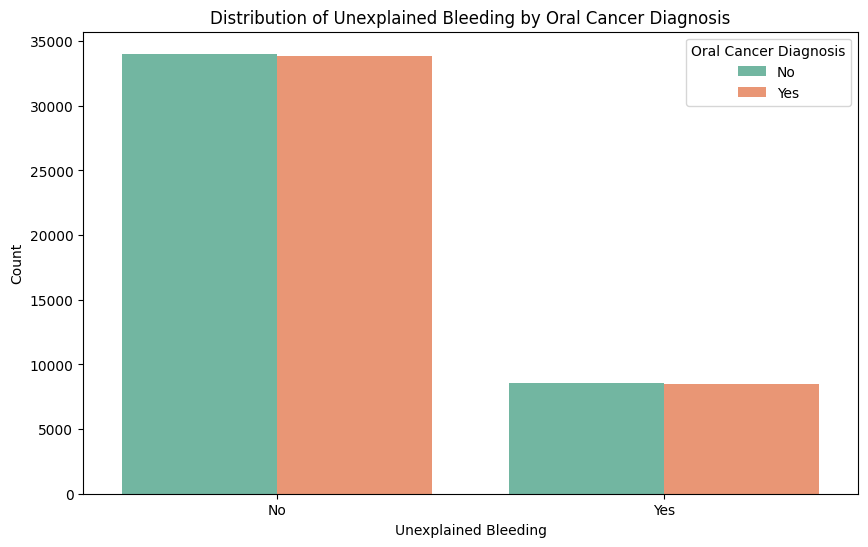

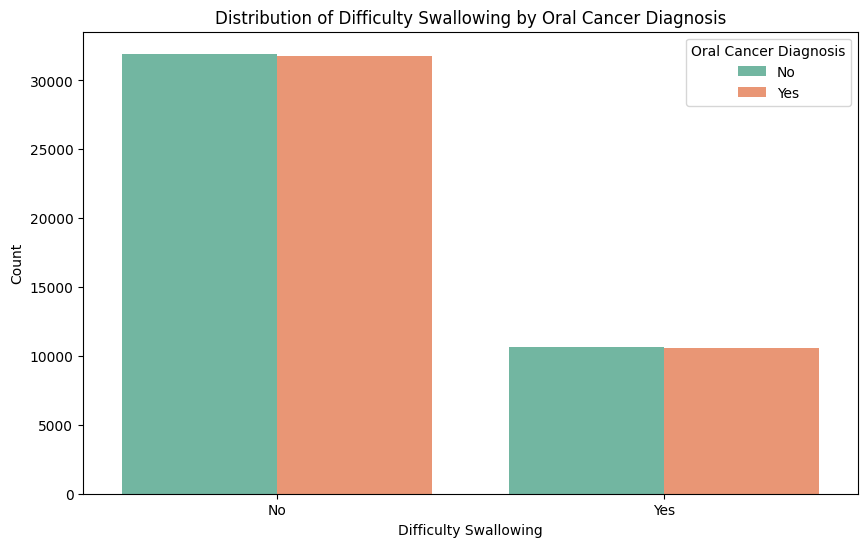

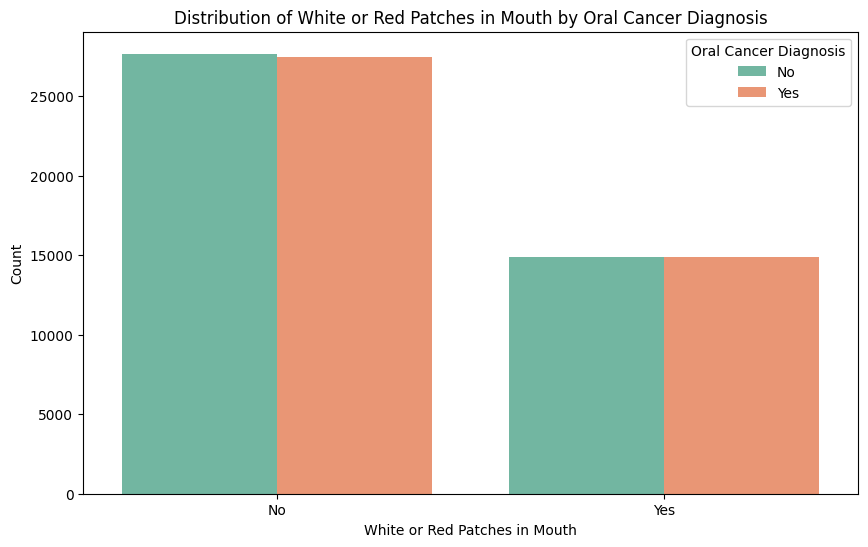

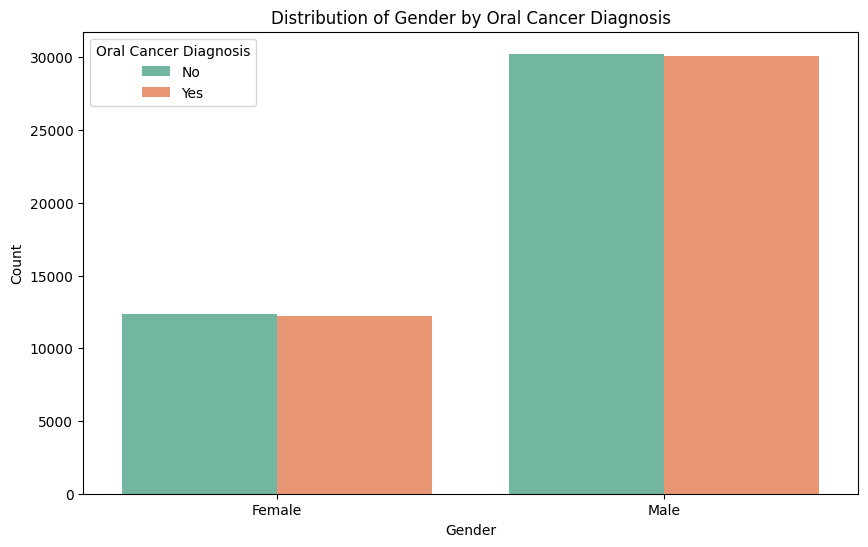

In [251]:
# Display categorical variables
for attribute in candidate_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_data, x=attribute, hue='Oral Cancer (Diagnosis)', palette='Set2')
    plt.title(f'Distribution of {attribute} by Oral Cancer Diagnosis')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.legend(title='Oral Cancer Diagnosis')
    plt.show()

**Age vs Oral Cancer**

In [250]:
# Separete the data into two groups based on Oral Cancer Diagnosis
group1 = merged_data[merged_data['Oral Cancer (Diagnosis)'] == 'Yes']
group2 = merged_data[merged_data['Oral Cancer (Diagnosis)'] == 'No']

# Perform T-test
t_stat, p_val = ttest_ind(group1['Age'], group2['Age'], equal_var=False)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# Decide on rejection of null hypothesis
alpha = 0.05
if p_val < alpha:
    print("\nReject the null hypothesis: There is a significant difference in age between oral cancer and non-cancer groups.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in age between oral cancer and non-cancer groups.")

T-statistic: 0.673
P-value: 0.501

Fail to reject the null hypothesis: There is no significant difference in age between oral cancer and non-cancer groups.


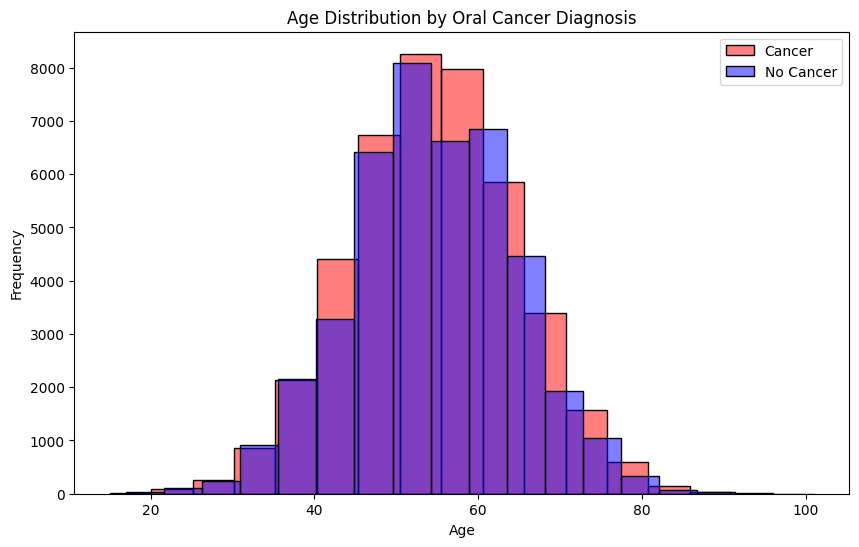

In [258]:
plt.figure(figsize=(10, 6))
sns.histplot(data=group1, x='Age', color='red', label='Cancer',  alpha=0.5, bins=17)
sns.histplot(data=group2, x='Age', color='blue', label='No Cancer', alpha=0.5, bins=17)
plt.title('Age Distribution by Oral Cancer Diagnosis')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()